In [1]:
#Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('drive/MyDrive/RA/Data')
os.listdir()

FileNotFoundError: ignored

In [ ]:
d1=pd.read_csv('Dataset_1.csv',parse_dates=['early_planting_date','late_planting_date'])
d1['early_year']=d1.early_planting_date.dt.year
d1['late_year']=d1.late_planting_date.dt.year

d1['early_month']=d1['early_year']*100+d1.early_planting_date.dt.month
d1['late_month']=d1['late_year']*100+d1.late_planting_date.dt.month

d1['early_week']=d1.early_planting_date.dt.week
d1['late_week']=d1.late_planting_date.dt.week

d1['early_week']=d1['early_year']*100+d1['early_week']
d1['late_week']=d1['late_year']*100+d1['late_week']

d1['plant_window']=d1.late_planting_date-d1.early_planting_date
d1['plant_window']=d1['plant_window'].dt.days
d1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,population,site,original_planting_date,early_planting_date,late_planting_date,required_gdus,scenario_1_harvest_quantity (number of ears),scenario_2_harvest_quanitity (number of ears),Unnamed: 8,population.1,scenario,Planting site either 0 or 1,planting_date,week,harvest_quantity,capacity,early_year,late_year,early_month,late_month,early_week,late_week,plant_window
0,p_1,1,1/1/20,2020-01-01,2020-02-19,1060,354,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020,202001,202002,202001,202008,49
1,p_2,1,1/1/20,2020-01-01,2020-01-29,1060,342,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020,202001,202001,202001,202005,28
2,p_3,1,1/1/20,2020-01-01,2020-02-19,1060,300,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020,202001,202002,202001,202008,49
3,p_4,1,1/1/20,2020-01-01,2020-02-12,965,282,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020,202001,202002,202001,202007,42
4,p_5,1,1/1/20,2020-01-01,2020-02-12,1060,171,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020,202001,202002,202001,202007,42


# Dataset 1

## Population VS Early/Late Plant Date


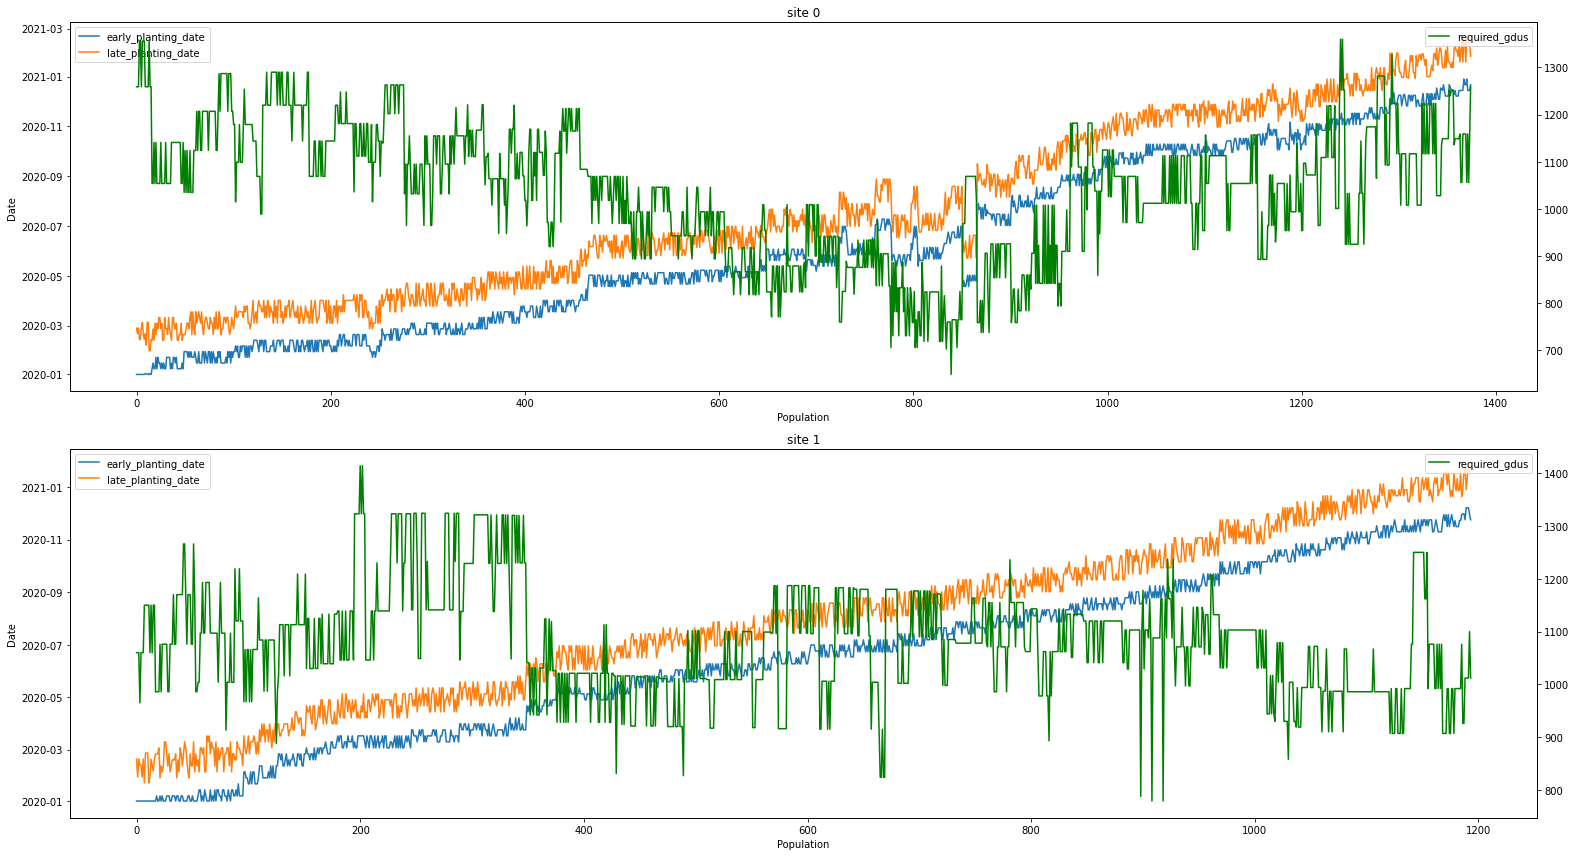

In [ ]:
d1_site0=d1[d1.site==0]
d1_site1=d1[d1.site==1]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(22,12), tight_layout=True)

ax11 = ax1.twinx()
ax1.plot(d1_site0.reset_index()[['early_planting_date','late_planting_date']])
ax11.plot(d1_site0.reset_index()[['required_gdus']],'g')
ax1.set_xlabel('Population')
ax1.set_ylabel('Date')
ax1.legend(['early_planting_date','late_planting_date'])
ax11.legend(['required_gdus'])
ax1.set_title('site 0')

ax21 = ax2.twinx()
ax2.plot(d1_site1.reset_index()[['early_planting_date','late_planting_date']])
ax21.plot(d1_site1.reset_index()[['required_gdus']],'g')
ax2.set_xlabel('Population')
ax2.set_ylabel('Date')
ax2.legend(['early_planting_date','late_planting_date'])
ax21.legend(['required_gdus'])
ax2.set_title('site 1')
plt.show()

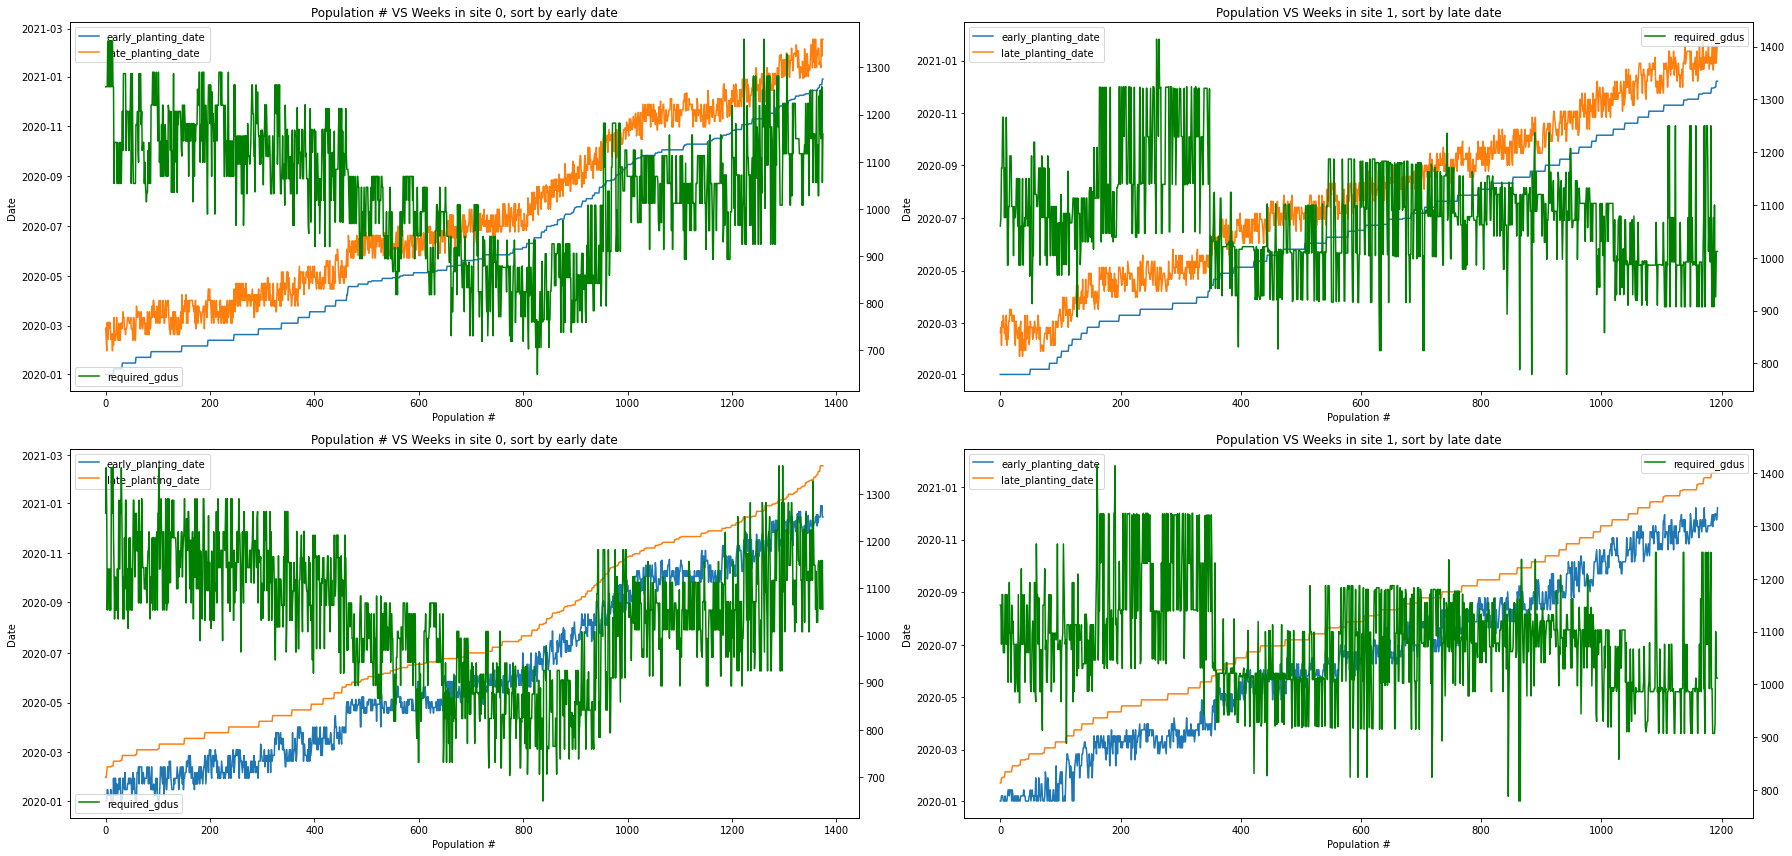

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(25,12), tight_layout=True)

ax11 = ax1.twinx()
ax31 = ax3.twinx()
ax11.plot(d1_site0.sort_values('early_planting_date').reset_index()[['required_gdus']],'g')
ax31.plot(d1_site0.sort_values('late_planting_date').reset_index()[['required_gdus']],'g')
ax1.plot(d1_site0.sort_values('early_planting_date').reset_index()[['early_planting_date','late_planting_date']])
ax3.plot(d1_site0.sort_values('late_planting_date').reset_index()[['early_planting_date','late_planting_date']])

ax1.set_xlabel('Population #')
ax1.set_ylabel('Date')
ax1.set_title('Population # VS Weeks in site 0, sort by early date')
ax3.set_xlabel('Population #')
ax3.set_ylabel('Date')
ax3.set_title('Population # VS Weeks in site 0, sort by early date')
ax1.legend(['early_planting_date','late_planting_date'])
ax3.legend(['early_planting_date','late_planting_date'])
ax11.legend(['required_gdus'])
ax31.legend(['required_gdus'])

ax21 = ax2.twinx()
ax41 = ax4.twinx()
ax21.plot(d1_site1.sort_values('early_planting_date').reset_index()[['required_gdus']],'g')
ax41.plot(d1_site1.sort_values('late_planting_date').reset_index()[['required_gdus']],'g')
ax2.plot(d1_site1.sort_values('early_planting_date').reset_index()[['early_planting_date','late_planting_date']])
ax4.plot(d1_site1.sort_values('late_planting_date').reset_index()[['early_planting_date','late_planting_date']])
ax2.set_xlabel('Population #')
ax2.set_ylabel('Date')
ax2.set_title('Population VS Weeks in site 1, sort by late date')
ax4.set_xlabel('Population #')
ax4.set_ylabel('Date')
ax4.set_title('Population VS Weeks in site 1, sort by late date')
ax2.legend(['early_planting_date','late_planting_date'])
ax4.legend(['early_planting_date','late_planting_date'])
ax21.legend(['required_gdus'])
ax41.legend(['required_gdus'])
plt.show()

# add plant window 

## Population Count VS Early/Late Plant Date

Text(0, 0.5, 'Population Count')

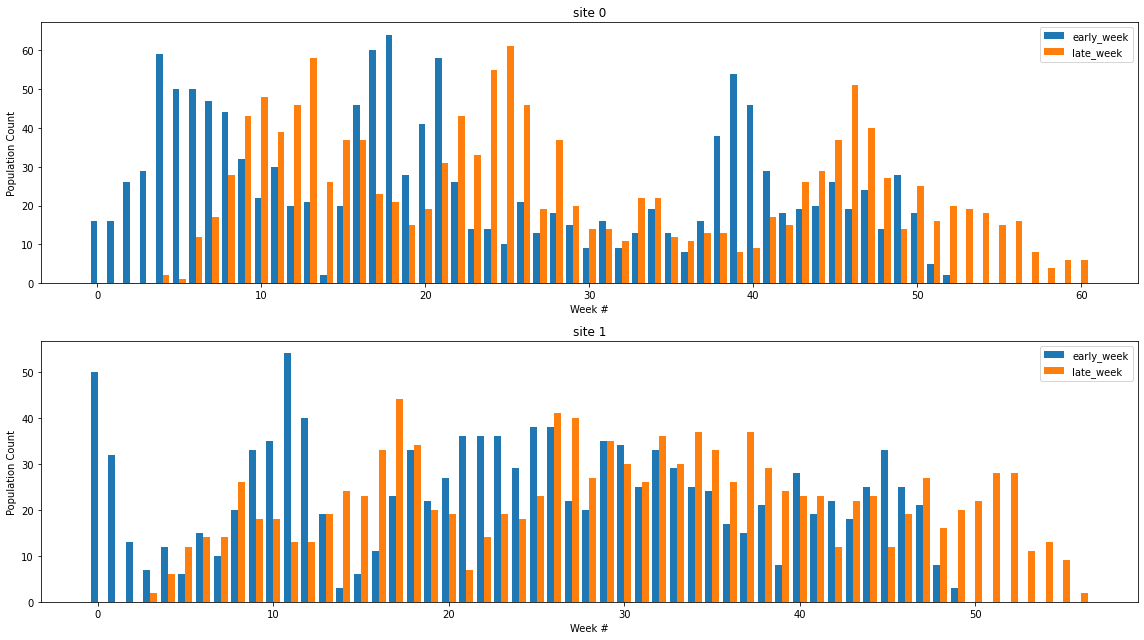

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), tight_layout=True)
week_pop_0=pd.concat((pd.DataFrame(d1_site0['early_week'].value_counts(sort=False)),pd.DataFrame(d1_site0['late_week'].value_counts(sort=False))),axis=1)
week_pop_0.fillna(0,inplace=True)
week_pop_1=pd.concat((pd.DataFrame(d1_site1['early_week'].value_counts(sort=False)),pd.DataFrame(d1_site1['late_week'].value_counts(sort=False))),axis=1)
week_pop_1.fillna(0,inplace=True)

x1s=list(range(len(week_pop_0.index)))
x1s=[x-0.2 for x in x1s]
x2s=list(range(len(week_pop_0.index)))
x2s=[x+0.2 for x in x2s]

ax1.bar(x1s,week_pop_0.early_week.values,width=0.4,label='early_week')
ax1.bar(x2s,week_pop_0.late_week.values,width=0.4,label='late_week')
ax1.legend(['early_week','late_week'])
ax1.set_title('site 0')
ax1.set_xlabel('Week #')
ax1.set_ylabel('Population Count')


x1s=list(range(len(week_pop_1.index)))
x1s=[x-0.2 for x in x1s]
x2s=list(range(len(week_pop_1.index)))
x2s=[x+0.2 for x in x2s]

ax2.bar(x1s,week_pop_1.early_week.values,width=0.4,label='early_week')
ax2.bar(x2s,week_pop_1.late_week.values,width=0.4,label='late_week')
ax2.legend(['early_week','late_week'])
ax2.set_title('site 1')
ax2.set_xlabel('Week #')
ax2.set_ylabel('Population Count')

## Harvest Quantity VS Early/Late Plant Date

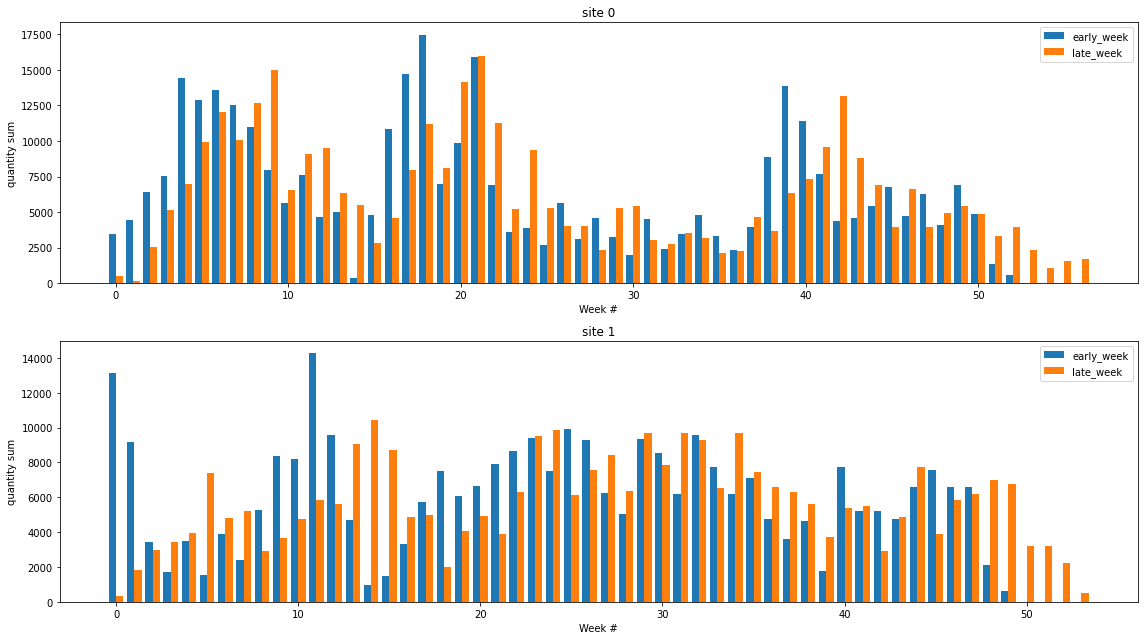

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), tight_layout=True)
df1=pd.DataFrame(d1_site0.groupby('early_week',as_index=False)[['scenario_1_harvest_quantity (number of ears)']].sum())
df2=pd.DataFrame(d1_site0.groupby('late_week',as_index=False)[['scenario_1_harvest_quantity (number of ears)']].sum())
ax1.bar(df1.index-0.2,df1['scenario_1_harvest_quantity (number of ears)'],width=0.4)
ax1.bar(df2.index+0.2,df2['scenario_1_harvest_quantity (number of ears)'],width=0.4)

df1=pd.DataFrame(d1_site1.groupby('early_week',as_index=False)[['scenario_1_harvest_quantity (number of ears)']].sum())
df2=pd.DataFrame(d1_site1.groupby('late_week',as_index=False)[['scenario_1_harvest_quantity (number of ears)']].sum())
ax2.bar(df1.index-.2,df1['scenario_1_harvest_quantity (number of ears)'],width=0.4)
ax2.bar(df2.index+.2,df2['scenario_1_harvest_quantity (number of ears)'],width=0.4)

ax1.set_xlabel('Week #')
ax1.set_ylabel('quantity sum')
ax1.legend(['early_week','late_week'])
ax1.set_title('site 0')

ax2.set_xlabel('Week #')
ax2.set_ylabel('quantity sum')
ax2.legend(['early_week','late_week'])
ax2.set_title('site 1')

plt.show()

## Hist Plot of required_gdus 

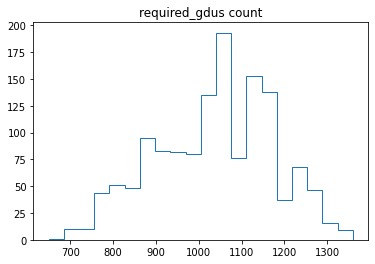

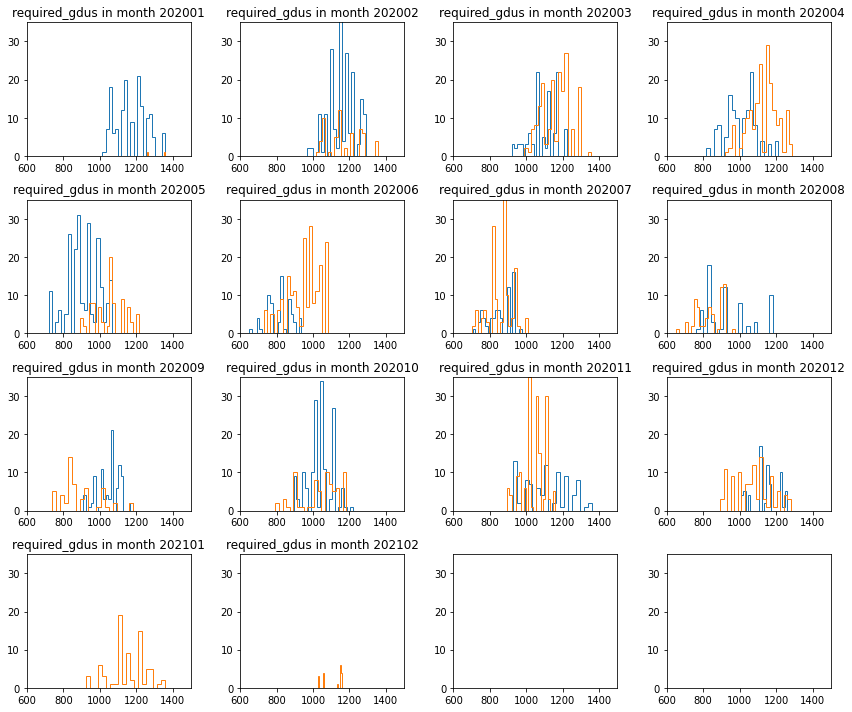

In [ ]:
plt.hist(d1_site0['required_gdus'],bins=20,histtype='step')
plt.title('required_gdus count')

months=sorted(d1.late_month.unique())
i=0
fig, ax = plt.subplots(4,4,figsize=(12,10), tight_layout=True)
for x in range(4):
    for y in range(4):
        try:
            ax[x,y].hist(d1_site0[d1_site0.early_month==months[i]]['required_gdus'],bins=20,histtype='step')
        except:pass
        try:
            ax[x,y].hist(d1_site0[d1_site0.late_month==months[i]]['required_gdus'],bins=20,histtype='step')
        except:pass
        try:
            ax[x,y].set_xlim([600,1500])
            ax[x,y].set_ylim([0,35])
            ax[x,y].set_title('required_gdus in month '+str(months[i]))
        except:pass
        i+=1


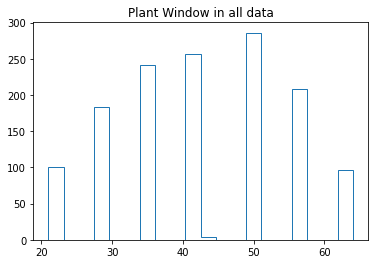

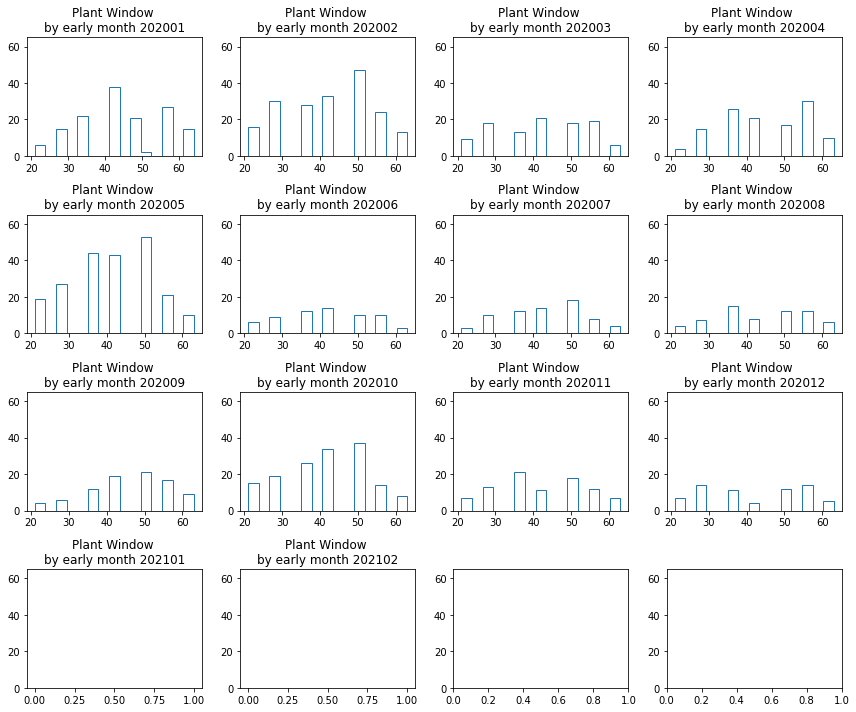

In [ ]:
plt.hist(d1_site0['plant_window'],bins=20,histtype='step')
plt.title('Plant Window in all data')

months=sorted(d1.late_month.unique())
i=0
fig, ax = plt.subplots(4,4,figsize=(12,10), tight_layout=True)
for x in range(4):
    for y in range(4):
        try:
            ax[x,y].hist(d1_site0[d1_site0.early_month==months[i]]['plant_window'],bins=15,histtype='step')
        except:pass
        try:
            # ax[x,y].set_xlim([600,1500])
            ax[x,y].set_ylim([0,65])
            ax[x,y].set_title('Plant Window \nby early month '+str(months[i]))
        except:pass
        i+=1


# Dataset 2

In [ ]:
d2=pd.read_csv('Dataset_2.csv',parse_dates=['date'])
d2['year']=d2.date.dt.year
d2['week_of_year']=d2.date.dt.week
d2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,GDUs for site_0,Forecast(GDUs for site_0),Lower Confidence Bound(GDUs for site_0),Upper Confidence Bound(GDUs for site_0),year,week_of_year
0,2009-01-01,11.438115,NaN,NaN,NaN,2009,1
1,2009-01-02,11.603950,NaN,NaN,NaN,2009,1
2,2009-01-03,11.606865,NaN,NaN,NaN,2009,1
3,2009-01-04,11.917281,NaN,NaN,NaN,2009,1
4,2009-01-05,12.283949,NaN,NaN,NaN,2009,2


## GDU Trends

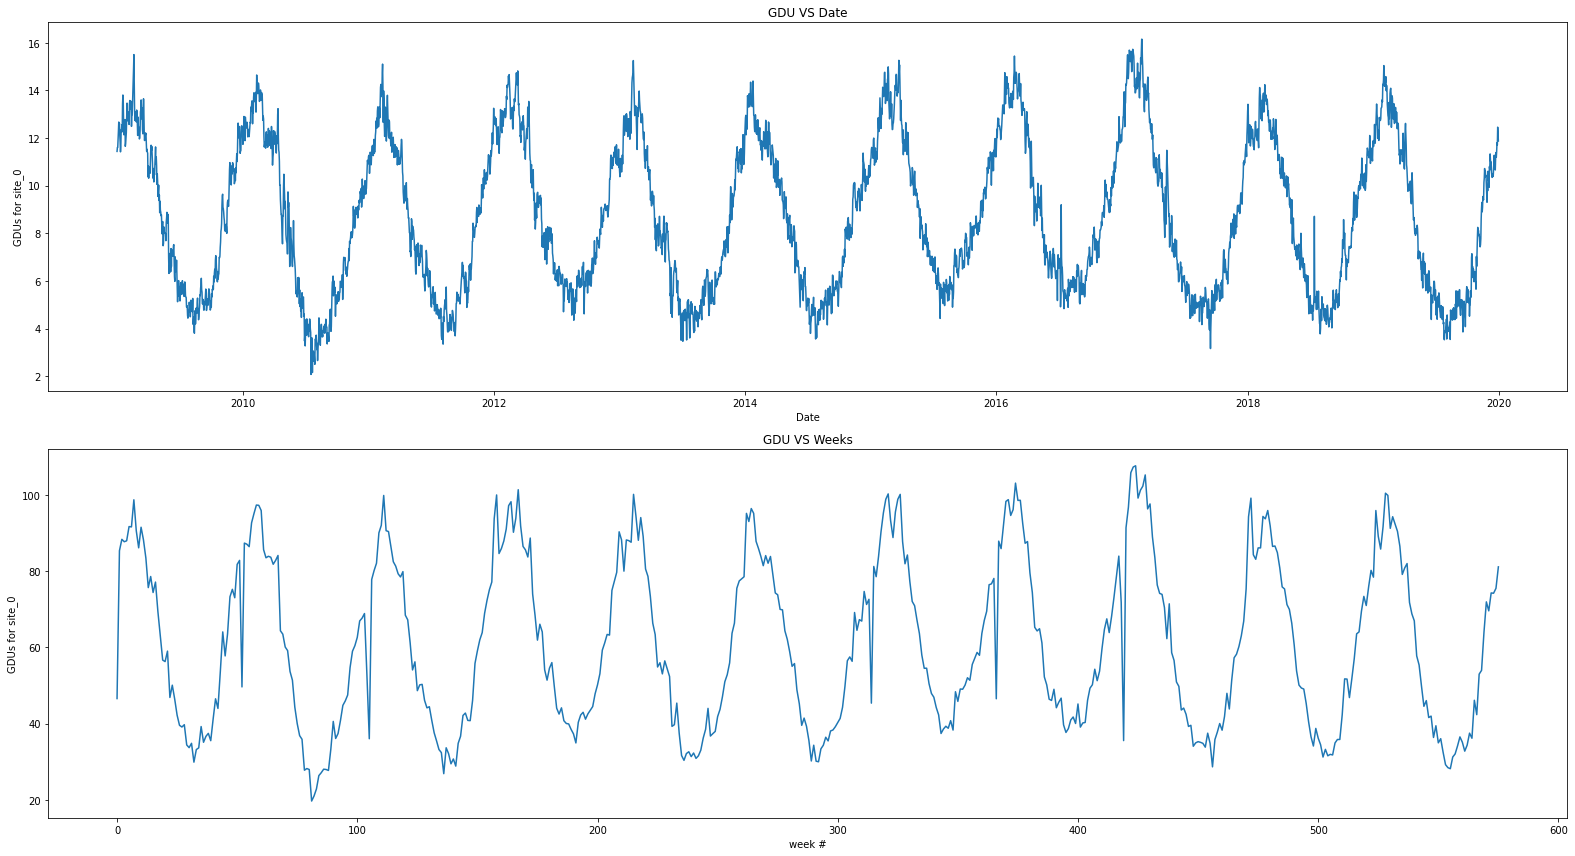

In [ ]:
d2_by_week=d2.groupby(['year','week_of_year'],as_index=False).sum()
d2_by_week=d2_by_week[d2_by_week['GDUs for site_0']>0]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22,12), tight_layout=True)

ax1.plot(d2['date'],d2['GDUs for site_0'])
ax2.plot(d2_by_week['GDUs for site_0'])
ax1.set_xlabel('Date')
ax1.set_ylabel('GDUs for site_0')
ax1.set_title('GDU VS Date')
ax2.set_xlabel('week #')
ax2.set_ylabel('GDUs for site_0')
ax2.set_title('GDU VS Weeks')

plt.show()
# noted that we will find some unexpected sharp drop in week sum GDUs in about April every few of year. 
# This is sth we dont know from daily plot. And since we harvest weekly, this information might be useful.